In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv("dermatology_database_1.csv")

In [12]:
# Replace '?' with NaN and convert 'age' to numeric
df['age'] = df['age'].replace('?', np.nan)
df['age'] = pd.to_numeric(df['age'])
df['age'].fillna(df['age'].median(), inplace=True)
df['age'] = df['age'].astype(int)

In [13]:
# Extracting features and labels
X = df.drop(columns=['class'])
y = df['class']

In [14]:
# Standardizing features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
clean_df = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y.reset_index(drop=True)], axis=1)

In [16]:
# Defining features and labels
X = clean_df.drop(columns=['class'])
y = clean_df['class']

In [17]:
# making test and train splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Initializing the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', C=1, gamma='scale'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}


🔍 Training Logistic Regression...
✅ Accuracy: 0.9595

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      0.83      0.91        12
           3       1.00      0.93      0.97        15
           4       0.77      1.00      0.87        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.97      0.96      0.96        74



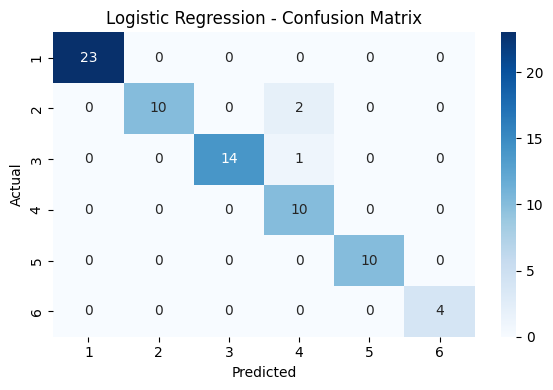


🔍 Training Random Forest...
✅ Accuracy: 0.9595

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.95      0.96      0.95        74
weighted avg       0.96      0.96      0.96        74



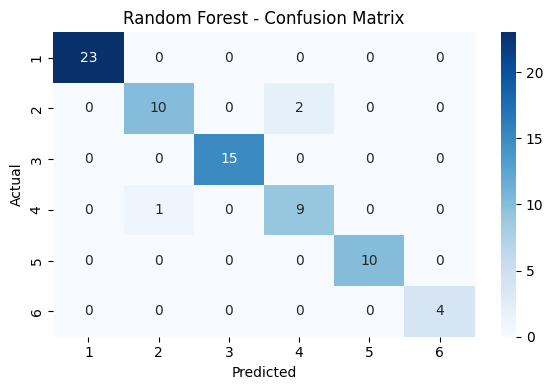


🔍 Training Support Vector Machine...
✅ Accuracy: 0.9730

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      0.83      0.91        12
           3       1.00      1.00      1.00        15
           4       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.98      0.97      0.97        74



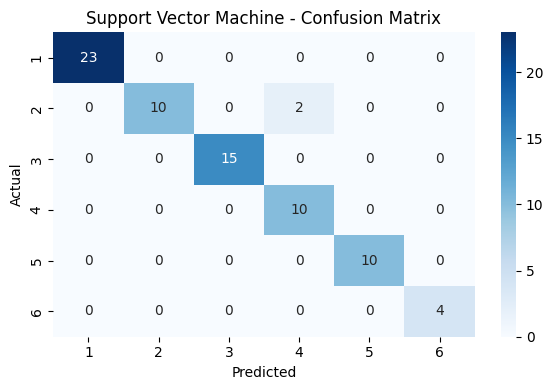


🔍 Training K-Nearest Neighbors...
✅ Accuracy: 0.9189

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.89      0.67      0.76        12
           3       1.00      0.93      0.97        15
           4       0.67      1.00      0.80        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.92        74
   macro avg       0.93      0.93      0.92        74
weighted avg       0.94      0.92      0.92        74



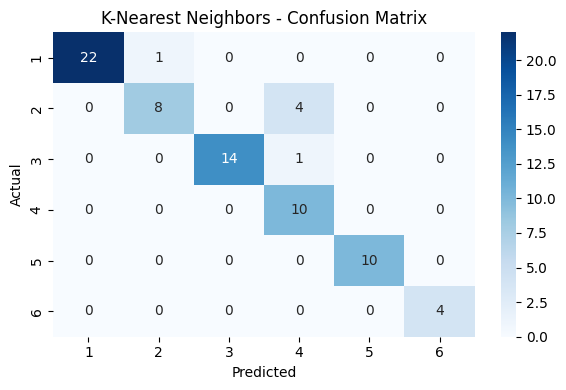

In [19]:
# Training and evaluating the models
for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_counts.index, yticklabels=class_counts.index)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


In [21]:
# Cross-validation
print("\nPerforming 5-Fold Cross-Validation on Random Forest...")
cv_scores = cross_val_score(models['Random Forest'], X, y, cv=5)
print("CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))


Performing 5-Fold Cross-Validation on Random Forest...
CV Accuracy Scores: [0.98648649 1.         0.97260274 0.98630137 0.94520548]
Mean CV Accuracy: 0.9781
